# Mari Berkenalan
Sebelumnya perkenalkan nama saya Muhammad Aswan Syahputra, data mentor DQLab, Sensometrics Specialist di Sensolution.ID dan saat ini juga berprofesi sebagai Data Analyst di Jabar Digital Service. 

Selamat datang di modul “A walk into sensory science”! Di dalam modul ini, saya akan mengajak Anda untuk berkenalan dengan suatu bidang spesifik yang banyak menggunakan metode analisis data yaitu Sensory Science.

Di dalam Bahasa Indonesia sensory science dan riset mengenainya secara umum disebut dengan Ilmu Sensoris, Evaluasi Sensoris, atau Uji Organoleptik.
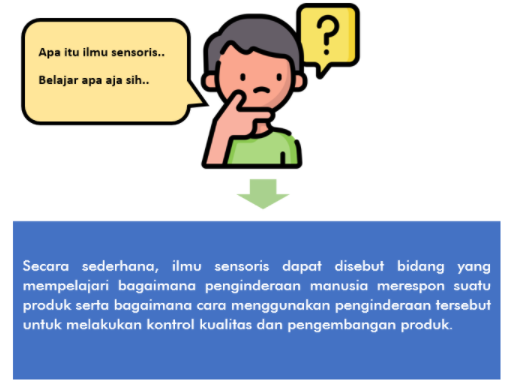

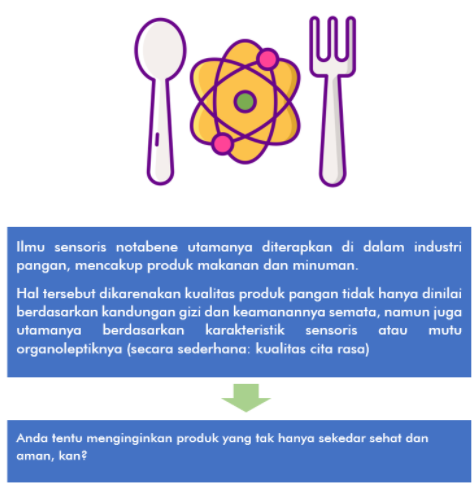

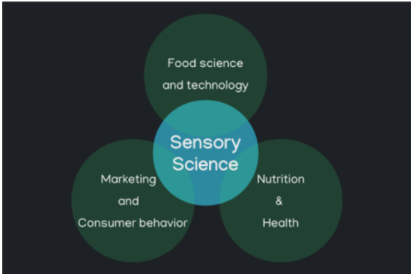

Oleh karena itu, dalam tahap pengembangan produk pangan dan tahap kontrol kualitas di industri pangan acapkali diterapkan metodologi ilmu sensoris. Sesederhana saat menyeduh teh/kopi atau memasakan makanan, tentu Anda 
harus mencicipinya terlebih dahulu kan?
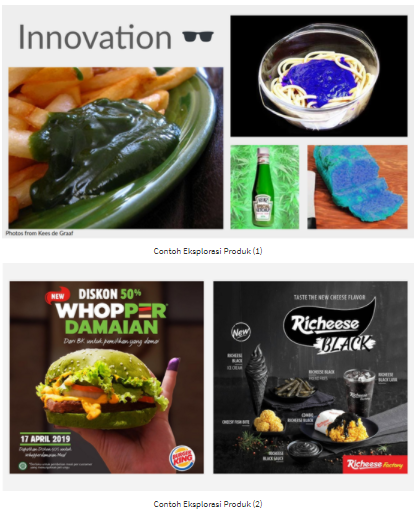

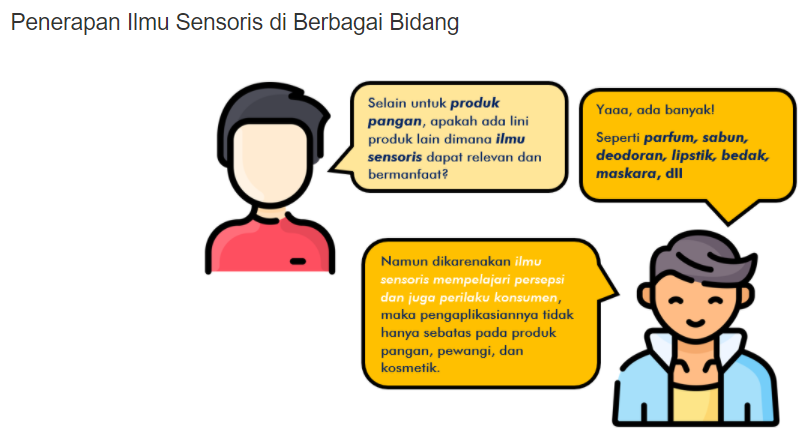

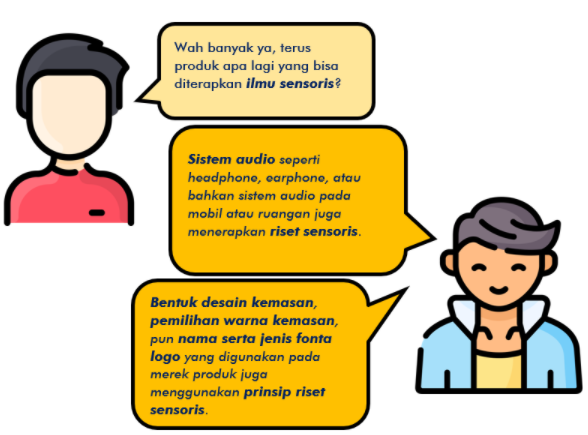

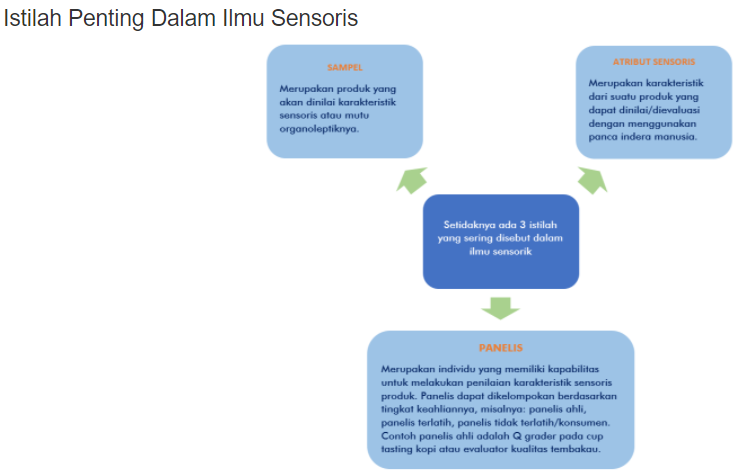

https://youtu.be/lVe25lpVK0c

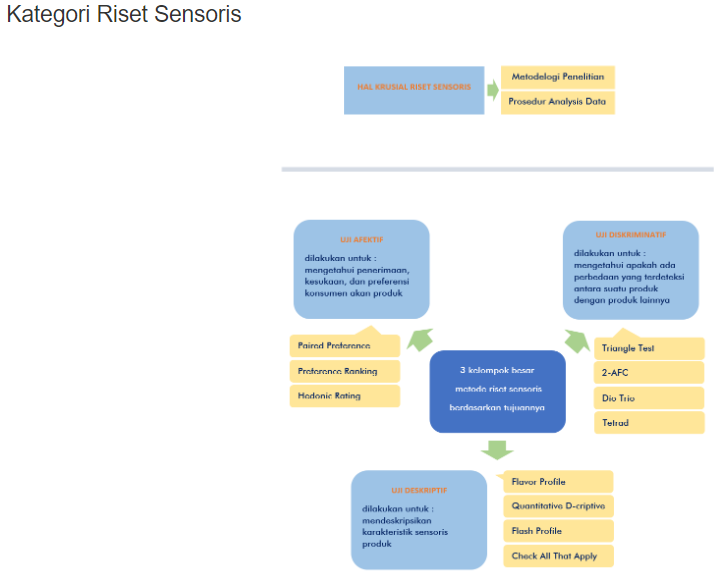

# Mini Challenge
Suatu perusahaan parfum ingin mengembangkan parfum baru. Oleh karena itu, perusahaan ingin mengetahui profil sensoris dari parfum komersial yang telah ada sebagai bahan pertimbangan. Menurut Anda metode riset sensoris apa yang harus dilakukan oleh tim research and development perusahaan tersebut?

# Mengenal Data - Part 1
Setelah mempelajari sedikit teori mengenai ilmu sensoris, sekarang mari kita belajar sedikit lebih dalam mengenai analisis data riset sensoris. Anda akan diajak melakukan analisis data untuk mempelajari karakteristik sensoris produk cokelat komersial.

Riset produk cokelat tersebut dilakukan dengan menggunakan metode Quantitative Descriptive Analysis (QDA). Masih ingatkah Anda metode QDA termasuk dalam kategori riset sensoris apa?

Data hasil riset sensoris tersebut tersedia sebagai “https://storage.googleapis.com/dqlab-dataset/chocolates.csv". Silakan Anda impor berkas tersebut sebagai chocolates dengan menggunakan fungsi read_csv() dari paket readr. Selain itu, aturlah sehingga kolom panelist, session, rank, dan product dibaca sebagai factor dengan menggunakan fungsi col_factor(). Khusus untuk kolom product, juga dilakukan pengaturan urutan level faktor.

In [ ]:
library(readr)

chocolates <- 
  read_csv(
    "https://storage.googleapis.com/dqlab-dataset/chocolates.csv",
    col_types = cols(
      panelist = col_factor(),
      session = col_factor(),
      rank = col_factor(),
      product = col_factor(levels = paste0("choc", 1:6)),
      .default = col_integer()
    )
  )
chocolates

# Mengenal Data - Part 2: Eksplorasi Struktur Data
Setelah berhasil mengimpor data chocolates, selanjutnya silakan Anda lakukan eksplorasi mengenai struktur data pada chapter sebelumnya. 

Ada berapa banyak observasi (baris) dan variabel (kolom) pada data tersebut? Terdapat pada kolom apakah informasi panelis dan sampel? Apakah seluruh jenis data pada setiap kolom sudah sesuai? Anda dapat memanfaatkan fungsi skim() dari paket skimr.

In [ ]:
install.packages("skimr",repos = "http://cran.us.r-project.org")

library(skimr)

skim(chocolates)

# Mengenal Data - Part 3
Setelah mengetahui nama kolom yang memiliki informasi panelis dan sampel, selanjutnya dapatkah Anda menemukan nama-nama sampel dan menghitung jumlah sampel yang disajikan pada penelitian tersebut? Serta ada berapakah jumlah panelis yang terlibat? Anda akan memerlukan fungsi summarise() dan n_distinct() dari paket dplyr. Isilah jawaban Anda ke dalam n_sample dan n_panelist!.

In [ ]:
library(dplyr)

chocolates %>% 
  summarise(
    sample = toString(levels(product)),
    n_sample = n_distinct(product),
    n_panelist = n_distinct(panelist)
  )

n_sample <- 6
n_panelist <- 29

# Mengenal Data - Part 4
Luar biasa! Anda menemukan bahwa dalam riset tersebut melibatkan enam produk cokelat dan 29 orang panelis. Selain informasi sampel dan panelis, dalam data chocolates tersebut juga informasi mengenai sesi pengujian, urutan penyajian sampel. Sehingga total ada empat kolom yang berisi informasi mengenai penelitian dan seluruhnya disimpan dalam empat kolom pertama di data chocolates. Berdasarkan informasi tersebut, dapatkah Anda menghitung jumlah atribut sensoris yang dievaluasi dalam riset tersebut? Serta dapatkah Anda membuat kode untuk menemukan nama-nama atribut sensoris tersebut? Simpanlah hasilnya sebagai atribut_sensoris!

In [ ]:
ncol(chocolates) - 4

atribut_sensoris <- colnames(chocolates[-c(1, 2, 3, 4)])
atribut_sensoris

# Mengenal Data - Part 5
Selanjutnya silakan Anda seleksi kolom atribut sensoris dari data chocolates dengan memanfaatkan obyek atribut_sensoris yang telah dibuat. Fungsi dari dplyr apakah yang digunakan untuk melakukan seleksi kolom? Setelah melakukan seleksi kolom, jalankanlah fungsi skim_without_charts() untuk mengamati rentang nilai yang diberikan oleh panelis terhadap atribut-atribut sensoris tersebut! Dapatkah Anda mengestimasi batas bawah batas atas dari skala penilaian yang digunakan oleh panelis?

In [ ]:
install.packages("skimr",repos = "http://cran.us.r-project.org")
library(skimr)
library(dplyr)

chocolates %>%
  select(atribut_sensoris) %>%
  skim_without_charts()

batas_bawah <- 0
batas_atas <- 10

# Dari Satu Sisi - Part 1
Selamat Anda telah berhasil melakukan eksplorasi data! Apakah sekarang Anda menjadi lebih mengerti mengenai data yang akan dianalisis? Saya harap jawabannya adalah “Ya, sekarang saya siap untuk menganalisis data tersebut!”.

Dalam analisis sensoris data uji deskriptif, fokus pertama yang dilakukan adalah inspeksi atribut sensoris satu per satu untuk mengungkapkan karakteristik produk. Analisis statistik yang akan dilakukan adalah uji univariat. Dalam metode QDA, uji univariat yang umumnya digunakan andalah analisis ragam atau biasa disebut ANOVA (Analysis of Variance). Hal tersebut dilakukan salah satunya karena data yang didapatkan dari metode riset sensoris QDA adalah berjenis rasio.

Sekarang Anda akan melakukan inspeksi atribut sensoris rasa pahit (bitterness) dari produk cokelat yang telah dievaluasi oleh panelis. Model yang akan digunakan adalah model lengkap dengan mempertimbangkan efek dari sampel, panelis, sesi pengujian, dan urutan sampel dalam pengujian. Pergunakanlah fungsi aov() untuk membuat model dan simpanlah sebagai model_bitterness!

In [ ]:
model_bitterness <- aov(bitterness ~ product + panelist + 
                          session + panelist:product + panelist:sebssion + 
                          product:session + rank, data = chocolates)

model_bitterness

# Dari Satu Sisi - Part 2
Kemudian jalankanlah anova() pada model_bitterness tersebut! Amati angka p-value dari faktor ‘product’ yang tersimpan dalam kolom Pr(>F), apakah hasilnya menunjukan pengaruh signifikan pada tingkat kepercayaan 95%? Catatan: pengaruh siginifikan terdeteksi dari suatu faktor apabila nilai p-value < 0,05 (jika menggunakan tingkat kepercayaan 95%).

In [1]:
anova(model_bitterness)

NameError: name 'anova' is not defined

# Dari Satu Sisi - Part 3
Ya! Keluaran dari kode tersebut menunjukan bahwa faktor ‘product’ memiliki angka p-value < 0,05. Artinya secara statistik terdapat perbedaan signifikan pada atribut rasa pahit yang disebabkan oleh keragaman sampel produk cokelat. Setelah menemukan hasil tersebut, maka tahap natural selanjutnya adalah penelusuran lebih mendalam pada level faktor produk. Bagaimanakah komparasi rasa pahit antar produk?

Anda dapat menjawab pertanyaan tersebut dengan cara melakukan analisis koefisien dari level pada faktor ‘product’. Adapun uji statistik yang digunakan adalah Student’s t-test untuk membandingkan angka koefisien antar level. Kabar baiknya, Anda cukup menjalankan fungsi summary.lm() pada model_bitterness yang telah dibuat sebelumnya. Berapakah angka koefisien dari choc2 (perhatikan nilai pada kolom Estimate)?

In [ ]:
summary.lm(model_bitterness)

-1.74 # dua digit di belakang koma/titik

# Dari Satu Sisi - Part 4
Anda menemukan bahwa angka koefisien dari choco2 adalah -1,74. Apakah artinya? Angka tersebut menunjukan bahwa selisih nilai antara rerata choc2 terhadap rerata choc1. Dengan kata lain, skor rasa pahit dari choc2 adalah 1,74 poin lebih rendah dibandingkan dengan choc1. Bagaimana dengan choc3? Apakah lebih pahit atau lebih tidak pahit dibandingkan dengan choc1?

# Dari Satu Sisi - Part 5 : Quiz
Mengapa produk acuan dalam analisis koefisien tersebut adalah choc1? Mengapa bukan choc2, choc3, choc4, choc5, atau choc6? Bagikan pendapat Anda melalui LinkedIn tag DQLab (@dqlab) dan Muhammad Aswan (@aswansyahputra) dan di Instagram dengan tag akun @DQLab dan @aswansyahputra_ ya! (Sedikit kata kunci sebagai petunjuk dari data mentor : “kontras”)



# Dari Satu Sisi - Part 6
Angka koefisien yang Anda dapatkan pada bagian sebelumnya merupakan perbandingan antar sampel terhadap produk choc1 sebagai acuan. Namun bagaimana jika sebenarnya Anda tidak memiliki produk tertentu sebagai acuan? Dengan kata lain, Anda hanya ingin mengetahui bagaimana karakteristik rasa pahit suatu sampel produk jika dibandingkan dengan rasa pahit produk cokelat ‘rata-rata’. Hal tersebut dapat dilakukan di R dengan cara mengatur jenis kontras yang digunakan terlebih dahulu lalu kemudian menjalankan ulang aov dan summary.lm() sebagaimana contoh berikut :



Keluaran dari baris kode tersebut tidak akan saya bahas lebih jauh. Sebaliknya, saya akan menawarkan alternatif lain yang lebih mudah dilakukan tanpa harus mengubah konfigurasi jenis kontras di R terlebih dahulu. Cara yang lebih mudah adalah dengan menggunakan fungsi AovSum() dari paket FactoMineR. Fungsi tersebut secara otomatis akan mengatur konfigurasi jenis kontras yang digunakan dalam analisis. Jalankanlah AovSum() pada model_bitterness dan simpanlah rasilnya sebagai res_bitterness! Kemudian bandingkanlah antara anova(model_bitterness) dengan res_bitterness$Ftest.

In [ ]:
library(FactoMineR)

res_bitterness <- AovSum(model_bitterness)

anova(model_bitterness)

res_bitterness$Ftest

# Dari Satu sisi - Part 7
Perhatikan keluaran berikut saat Anda mengekstrak isi dari res_bitterness$Ttest :



In [ ]:
res_bitterness$Ttest[1:7, 1:2]

c("choc1", "choc4", "choc2", "choc5", "choc6", "choc3")

Dari hasil keluaran tersebut Anda menemukan bahwa angka koefisien dari choc2 adalah 0,34 (dibulatkan). Angka tersebut mengindikasikan bahwa rerata skor rasa pahit choc2 adalah 0,34 poin lebih tinggi dibandingkan dengan rasa pahit ‘rata-rata’ cokelat secara keseluruhan. Berdasarkan keluaran tersebut, selanjutnya dapatkah Anda mengurutkan sampel produk cokelat dari yang paling pahit hingga paling tidak pahit?

# Dari Satu Sisi - Part 8
Lantas, bagaimanakah cara kita membandingkan rasa pahit antar sampel produk? Salah satu cara untuk mengetahui hal tersebut adalah dengan melakukan uji lanjut (post-hoc test) setelah melakukan ANOVA. Dalam contoh ini Anda diminta untuk melakukan uji lanjut menggunakan metode Tukey HSD yang tersedia di dalam paket agricolae sebagai fungsi HSD.test(). Simpanlah hasilnya sebagai posthoc_bitterness dan ektraklah elemen groups dari obyek tersebut!

In [ ]:
install.packages('agricolae ', repos="http://cran.rstudio.com/")
library(agricolae )

posthoc_bitterness  <- HSD.test(model_bitterness, trt = "product")
posthoc_bitterness$groups

# Dari Satu Sisi - Part 9
Sekarang cetaklah kembali posthoc_bitterness$groups pada konsol Anda dan perhatikanlah huruf-huruf yang terdapat pada kolom groups. Huruf-huruf tersebut menunjukan apakah terdapat perbedaan yang bermakna antar produk cokelat berdasarkan atribut rasa pahit. Apabila suatu produk mengandung huruf yang sama dengan produk lainnya, maka tidak terdapat perbedaan yang signifikan diantara mereka. Konfirmasilah hal tersebut dengan membuat grafik komparasi antar produk menjalankan fungsi plot.group() pada posthoc_bitterness! Tariklah kesimpulan dan bagikan hasilnya di akun LinkedIn dan sosial media Anda ya! Tentunya jangan lupa untuk tag akun DQLab dan data mentor (Muhammad Aswan) ya.

In [ ]:
install.packages('agricolae', repos="http://cran.rstudio.com/")
library(agricolae)

posthoc_bitterness$groups

plot.group(posthoc_bitterness, variation = "SE")

# Dari Satu Sisi - Part 10
Selamat Anda telah berhasil melakukan analisis terhadap aribut sensoris rasa pahit (bitterness)! Berikut merupakan ringkasan kode yang telah Anda jalankan untuk atribut sensoris rasa pahit :
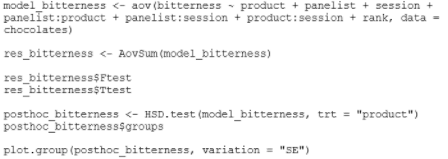
Sekarang dapatkah Anda melakukan hal yang serupa untuk 13 atribut sensoris lainnya?

# Tak Cukup Satu Sisi - Part 1
Di dalam ilmu sensoris ada suatu istilah yang disebut dengan persepsi multisensoris (multisensory perception). Apakah persepsi multisensoris itu? Secara sederhana, persepsi multisensoris merupakan konsep yang menyatakan bahwa suatu produk tidak hanya dinilai berdasarkan satu aspek inderawi saja. Manusia cenderung menilai suatu produk secara holistik dengan mengintegrasikan persepsi dari berbagai aspek inderawi, contohnya penglihatan, pendengaran, pengecap, penciuman, dan peraba. Persepsi inderawi manusia saling berhubungan dan berintegrasi sehingga akhirnya menghasilkan persepsi utama untuk menilai suatu produk.

Sebagai konsekuensi dari hal tersebut, maka sulit untuk menilai sutu produk jika hanya berdasarkan satu atau sedikit atribut sensoris saja. Atribut sensoris akhirnya teragregasi menjadi suatu karakteristik sensoris produk. Perlu dilakukan analisis yang mempertimbangkan banyak atribut sensoris sekaligus sehingga kita dapat mendapatkan karakteristik sensoris produk secara holistik.



# Tak Cukup Satu Sisi - Part 2
Dalam contoh berikut, Anda diminta untuk menghitung dan membuat visualisasi angka korelasi antar atribut sensoris dari produk cokelat. Anda akan menggunakan fungsi cor serta fungsi corrplot() dari paket corrplot. Manfaatkanlah obyek atribut_sensoris yang sebelumnya telah Anda buat! Buatlah kesimpulan terhadap grafik yang Anda dapatkan.

In [ ]:
ibrary(dplyr)
library(corrplot)

chocolates2 <- chocolates %>%
select(atribut_sensoris) %>%
cor() %>%
corrplot(
type = "upper",
method = "square",
diag = FALSE,
addgrid.col = FALSE,
order = "FPC",
tl.col = "gray30",
tl.srt = 30
)
chocolates2

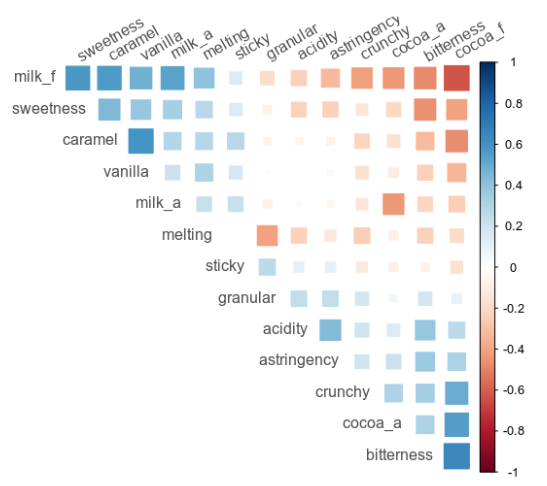
Visualisasi dari angka korelasi yang berhasil Anda buat menunjukan bahwa terdapat hubungan positif atau negatif antar atribut sensoris yang dirasakan oleh panelis. Sebagai contoh, rasa pahit dirasakan berbanding terbalik dengan rasa manis dan rasa susu, serta berbading lurus dengan aroma cokelat dan rasa asam. Atau misalnya rasa sepat yang dirasakan berbanding lurus dengan rasa asam dan juga rasa pahit. Apakah ada korelasi menarik lain yang Anda temukan?

Selain menggunakan matriks korelasi, interaksi dan asosiasi antar atribut sensoris tersebut selanjutnya juga dapat direpresentasikan ke dalam sebuah peta persepsi (perceptual map) atau ruang sensoris (sensory space). Peta persepsi atau ruang persepsi tersebut selanjutnya dapat digunakan untuk memetakan produk berdasarkan karakter sensoris yang holistik. Hal tersebut adalah tahap yang akan Anda lakukan selanjutnya, apakah Anda bersemangat?



# Tak Cukup Satu Sisi - Part 4
 

Analisis multivariat diperlukan untuk membuat peta persepsi atau ruang sensoris yang sebelumnya telah disinggung. Dikarenakan pada data QDA semua atribut dinilai menggunakan skala numerik, maka uji statistik yang dapat Anda gunakan adalah Principal Component Analysis (PCA). Apakah Anda sudah familiar dengan nama tersebut?

Data yang akan digunakan dalam analisis ini merupakan nilai agregasi atribut sensoris per sampel produk. Nilai ini didapatkan berdasarkan nilai rerata yang telah disesuaikan dengan model ANOVA yang sebelumnya telah Anda buat. Data adjusted mean dari chocolates tersedia sebagai berkas “chocolates_adjmean.rds” pada direktori kerja Anda. Imporlah data tersebut dengan menggunakan fungsi readRDS() dan simpanlah hasilnya sebagai chocolates_adjmean! Ada berapa baris dan kolom pada data tersebut?

In [ ]:
chocolates_adjmean <- readRDS("chocolates_adjmean.rds")
chocolates_adjmean

dim(chocolates_adjmean)

# Tak Cukup Satu Sisi - Part 5
Setelah berhasil mengimpor data chocolates_adjmean, sekarang Anda diminta untuk menjalankan fungsi PCA() dari pakt FactoMineR. Aturlah argumen graph menggunakan nilai FALSE dan simpan hasilnya sebagai chocolates_pca. Selain itu ekstraklah elemen eig dari chocolates_pca. Apakah yang Anda temukan?

In [ ]:
library(FactoMineR)

chocolates_pca <- PCA(chocolates_adjmean, graph = FALSE)
names(chocolates_pca)

chocolates_pca$eig

# Tak Cukup Satu Sisi - Part 6
Keluaran dari chocolates_pca$eig menujukan bahwa angka eigenvalue > 1 ditemukan pada dua principal component atau dimensi pertama. Selain itu, persentase varian kumulatif juga menunjukan nilai yang sangat besar (>75%). Oleh karena itu, dalam studi kasus ini peta persepsi atau ruang dimensi dapat diinterpretasi dengan menggunakan dua dimensi pertama saja. Sebelum lanjut ke tahap selanjutnya, buatlah grafik yang menunjukan angka eigenvalue dan persentase varian dengan menggunakan fungsi fviz_eig() dari paket factoextra! Aturlah argumen addLabels menggunakan nilai TRUE.

In [ ]:
library(factoextra)

fviz_eig(chocolates_pca, choice = "eigenvalue", addlabels = TRUE)

fviz_eig(chocolates_pca, choice = "variance", addlabels = TRUE)

# Tak Cukup Satu Sisi - Part 7
Sekarang saatnya Anda melakukan inspeksi terhadap peta persepsi atau ruang sensoris. Bagaimana peta sebaran produk cokelat dalam peta persepsi tersebut? Hal tersebut dapat Anda jawab dengan mudah menggunakan representasi grafik. Perhatikanlah grafik representasi produk cokelat dengan menjalankan baris kode berikut :

In [ ]:
library(factoextra)

fviz_pca_ind(chocolates_pca, repel = TRUE)

# Tak Cukup Satu Sisi - Part 8
Grafik tersebut menunjukan posisi dari setiap produk cokelat pada peta persepsi atau ruang sensoris. Prinsipnya produk yang letaknya berdekatan adalah produk yang memiliki karakteristik sensoris serupa. Sedangkan produk yang terletak berjauhan artinya memiliki karakteristik sensoris yang berbeda. Selain itu, produk yang terletak mendekati titik 0 atau pusat grafik artinya memiliki karakteristik ‘rata-rata’. Produk manakah yang memiliki karakteristik sensoris paling berlawanan dengan choc1? Jawablah dengan memberikan nilai TRUE atau FALSE pada dua nama produk yang paling berlawanan dengan choc1!

In [ ]:
library(factoextra)

fviz_pca_ind(chocolates_pca, repel = TRUE)

choc2 <- FALSE
choc3 <- TRUE
choc4 <- FALSE
choc5 <- FALSE
choc6 <- TRUE

# Tak Cukup Satu Sisi - Part 9
Luar biasa! Dengan menggunakan peta persepsi maka kategorisasi produk cokelat dapat dilihat dengan lebih mudah secara holistik mempertimbangkan seluruh atribut sensoris yang digunakan dalam riset. Sekarang saatnya Anda melakukan pengamatan pada atribut sensoris dengan menggunakan baris kode sebagai berikut :



In [ ]:
library(factoextra)

fviz_pca_var(chocolates_pca, repel = TRUE)

Grafik tersebut menunjukan bahwa dimensi pertama dari peta persepsi melakukan separasi antara produk yang memiliki rasa asam, rasa sepat, rasa pahit, dan cokelat terhadap produk yang memiliki rasa susu, rasa vanilla, rasa karamel, dan rasa manis yang tinggi. Selain itu dimensi pertama dan kedua juga memisahkan antara produk cokelat yang memiliki tekstur renyah dengan produk cokelat yang memiliki tekstur lengket dan mudah meleleh.

# Tak Cukup Satu Sisi - Part 10
Selain itu, dari grafik tersebut Anda juga dapat mengetahui korelasi antar atribut dengan mudah. Prinsipnya adalah apabila panah atribut sensoris menuju arah yang sama dan berhimpitan, maka terdapat hubungan berbanding lurus yang kuat diantara atribut sensoris tersebut. Apabila panah antar dua atribut sensoris membentuk sudut hampir siku, maka korelasi antar atribut sensoris tersebut relatif lemah lemah. Dengan atribut sensoris apakah daya leleh (melting) produk cokelat berkorelasi paling besar? Serta dengan atribut sensoris manakah rasa manis (sweetness) berkorelasi paling lemah? Tuliskan jawaban Anda sebagai vektor karakter untuk masing-masing pertanyaan!

In [ ]:
library(factoextra)

fviz_pca_var(chocolates_pca, repel = TRUE)

"sticky"

"crunchy"

# Tak Cukup Satu Sisi - Part 11
Akhirnya Anda ingin membuat relasi antara representasi sampel pada sensory space dengan atribut sensoris yang membentuk sensory space tersebut. Hal tersebut dapat mudah dilakukan dengan cara membuat grafik dalam satu bidang sejajar (dua plot dalam satu grafik). Di bawah telah diberikan kode untuk membuat grafik tersebut. Berikanlah komentar Anda terhadap grafik yang dihasilkan!

In [ ]:
library(factoextra)

fviz_pca_biplot(chocolates_pca, repel = TRUE, title = "Peta Persepsi Produk Cokelat Komersial")



# Tak Cukup Satu Sisi - Part 12
Selamat Anda telah berhasil melakukan analisis data riset sensoris mengenai produk cokelat! Apakah Anda menemukan hal-hal yang menarik?

# Pembukaan - Part 1
Anda telah berhasil melakukan analisis data per atribut sensoris dan juga analisis data untuk seluruh atribut sensoris secara simultan. Dalam proses analisis data tersebut Anda juga telah menggunakan kombinasi berbagai paket R hingga akhirnya mendapatkan hasil analisis untuk diinterpretasi lebih lanjut. Namun, masih ingatkah Anda seluruh nama-nama dari paket dan fungsi apa saja yang telah digunakan? Jawablah dengan menjalankan TRUE atau FALSE pada konsol R Anda!

In [ ]:
FALSE

# Pembukaan - Part 2
Ya! Hal tersebut sangatlah wajar dan itu pula yang juga saya alami saat melakukan analisis data sensoris. Ada banyak sekali paket dan fungsi yang dijalankan hingga akhirnya dapat dilakukan interpretasi untuk menghasilkan suatu kesimpulan. Berlatarbelakang hal tersebut, akhirnya saya mengembangkan paket R untuk analisis data sensoris sehingga dapat dilakukan dengan lebih mudah dan cepat. Paket tersebut bernama sensehubr dan tersedia di aswansyahputra/github.io/sensehubr.

Paket sensehubr dibangun dengan menggunakan tidyverse philosophy sehingga memiliki fungsi dan kinerja yang konsisten. Ada tiga fungsi utama di sensehubr untuk melakukan analisis data:

specify()
analyse()
visualise()
Pada bagian selajutnya saya akan ditunjukan prosedur analisis data chocolates dengan menggunakan paket sensehubr. Apakah Anda tertarik?

In [ ]:
TRUE

# Konsistensi
Di sensehubr, Anda dapat menggunakan fungsi specify() untuk memberitahukan apa metode riset sensoris digunakan serta informasi-informasi penting terkait riset yang terdapat pada data. Informasi yang dapat dimasukan adalah mengenai nama metode riset sensoris, kolom panelis, kolom sampel, kolom sesi pengujian, kolom urutan penyajian sampel, dan nama-nama kolom atribut sensoris. Perhatikanlah contoh berikut!



In [ ]:
metode_riset <- TRUE
kolom_panelis <- TRUE
jumlah_panelis <- TRUE
kolom_sampel <- TRUE
nama_sampel <- FALSE
jumlah_sampel <- TRUE
kolom_atribut_sensoris <- TRUE
jumlah_atribut_sensoris <- TRUE
informasi_hedonik <- TRUE
model_statistik <- FALSE

# Dari Satu Sisi: ala SenseHub - Part 1
chocolates_qda merupakan obyek R berjenis sensory table yang memiliki dua komponen utama, yaitu data dan metadata riset sensoris yang dilakukan. Dikarenakan informasi penting telah tersimpan di dalam metadata, maka selanjutnya Anda dapat melakukan analisis data dengan lebih mudah menggunakan fungsi analyse() dari sensehubr. Ada dua jenis analisis yang dapat Anda lakukan terhadap sensory table, yaitu analisis lokal dan analisis global. Adapun uji statistik yang digunakan akan dipilih secara cerdas oleh sensehubr, memudahkan sekali kan?

Dalam contoh berikut, Anda ditunjukan bagaimana cara melakukan analisis lokal dengan menggunakan fungsi analyse dengan argumen choice = “local”.

In [ ]:
"Cochran's Q test" <- FALSE
"Analysis of variance" <- TRUE
"Chi-square test" <- FALSE

# Dari Satu Sisi: ala SenseHub - Part 2
Selamat Anda telah berhasil melakukan uji ANOVA untuk seluruh atribut sensoris dengan menggunakan satu fungsi analyse()! Fungsi analyse() dirancang sehingga dapat mendeteksi dan menentukan model yang digunakan dalam ANOVA secara otomatis. Namun, saat ini fitur uji lanjut masih belum tersedia di sensehubr. Selanjutnya bagaimanakah jika Anda ingin membuat visualisasi dari data chocolates_qda? Anda cukup menjalankan fungsi visualise() pada obyek chocolates_qda_local.

In [ ]:
"Dotplot" <- FALSE
"Radar Plot" <- TRUE
"Dumbell Plot" <- FALSE
"Spider Plot" <- TRUE

# Tak Cukup Satu Sisi: ala SenseHub - Part 1
Setelah mempelajari karakteristik produk cokelat melalui analisis lokal, selanjutnya Anda ingin mempelajari lebih lanjut dengan cara melakukan analisis global. Hal tersebut dapat dilakukan dengan mudah dan konsisten menggunakan fungsi analyse() seperti yang telah Anda lakukan pada analisis lokal. Perbedaannya adalah kali ini isi dari argumen choice adalah “global”. Perhatikan contoh berikut :

In [ ]:
5

# Tak Cukup Satu Sisi: ala SenseHub - Part 2
Anda pun dapat kembali menjalankan fungsi visualise() pada obyek hasil analisis global, yaitu qda_chocolates_global. Ada tiga opsi untuk argumen choice yang dapat dipergunakan, yaitu “eigenvalue”, “product”, dan “attribute”.

visualise(chocolates_qda_global, choice = "eigenvalue")

visualise(chocolates_qda_global, choice = "product", repel = TRUE)

visualise(chocolates_qda_global, choice = "attribute", repel = TRUE)


Tugas

Berdasarkan grafik yang Anda dapatkan, berapakah jumlah persentase kumulatif varians dari principal component/dimension 1 dan 2?

In [2]:
96.4 # tanpa penanda persen (%)

96.4

# Penutupan
Selamat Anda telah berhasil menyelesaikan modul “A walk into sensory science” ini! Saya sungguh senang dan berbangga karena mendapatkan kesempatan untuk memperkenalkan tentang ilmu sensoris kepada Anda. Apakah Anda juga merasa senang setelah sedikit berkenalan dengan bidang keilmuan ini?

Apakah cukup sampai disini mengenai analisis ilmu sensoris? Tentu tidak! Ada banyak analisis lainnya yang dapat dilakukan pada data hasil riset sensoris. Sebagai contoh, Anda dapat melakukan analisis klaster pada hasil uji multivariat PCA untuk mengelompokan produk berdasarkan karaktristik sensoris yang mereka miliki. Selain itu masih banyak metode riset sensoris yang belum dibahas dalah modul ini, contohnya adalah kelompok besar uji diskriminatif dan afektif yang memiliki berbagai variasi metodologi di dalamnya. QDA pun hanya merupakan salah satu dari sekian banyak metode riset sensoris deksriptif yang tersedia.

Mungkin terbesit di benak Anda apakah ilmu sensoris dapat digunakan untuk mengoptimasi produk agar dapat lebih disukai oleh konsumen? Bagaimanakan penggunaan riset sensoris untuk memperbaiki karakteristik produk? Dapatkah memperkirakan produk baru yang Anda kembangkan akan diterima dengan baik oleh konsumen? Mungkin itu akan kita bahas pada kesempatan lainnya, ya!

 

